In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def plot(df1, title):
    mistake_med = df1['common mistake'].tail(140).median()
    mistake_weighted_med = df1['common mistake weighted'].tail(140).median()
    scale = mistake_med / mistake_weighted_med
    
    fig, ax1 = plt.subplots()
    color1 = 'blue'
    ax1.set_xlabel('Slice')
    ax1.set_ylabel('Mistake') 
    ax1.plot(df1['common mistake'], color=color1, label='Mistake')
    ax1.axhline(mistake_med, color=color1, linestyle=':', lw=2, alpha=0.9,
                label=f'Median: {mistake_med:.2f}')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_ylim(0)

    ax2 = ax1.twinx()
    color2 = 'darkgreen'
    ax2.set_ylabel('Mistake (Weighted)') 
    ax2.plot(df1['common mistake weighted'] * scale, color=color2, linestyle='-', label='Mistake (Weighted)')
    ax1.axhline(mistake_weighted_med * scale, color=color2, linestyle='--', lw=1.4, alpha=0.5,
                label=f'Median (Weighted): {mistake_weighted_med:.2f}')
    ax2.tick_params(axis='y', labelcolor=color2)

    ax2.set_ylim(ax1.get_ylim())
    ax2.set_yticks(ax1.get_yticks())
    ax2.set_yticklabels([f"{y / scale:.0f}" for y in ax2.get_yticks()])

    plt.title(title)
    ax1.axvline(140, color='gray', alpha=0.5, linestyle='--')
    ax1.axvline(160, color='gray', alpha=0.5, linestyle='--')
    ax1.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    ax1.set_axisbelow(True)  
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(10))  
    ax1.xaxis.set_major_locator(plt.MultipleLocator(50)) 
    plt.xlim(0, 300)
    plt.tight_layout()

    fig.legend(loc='upper right', bbox_to_anchor=(0.87, 0.93))

    plt.show()


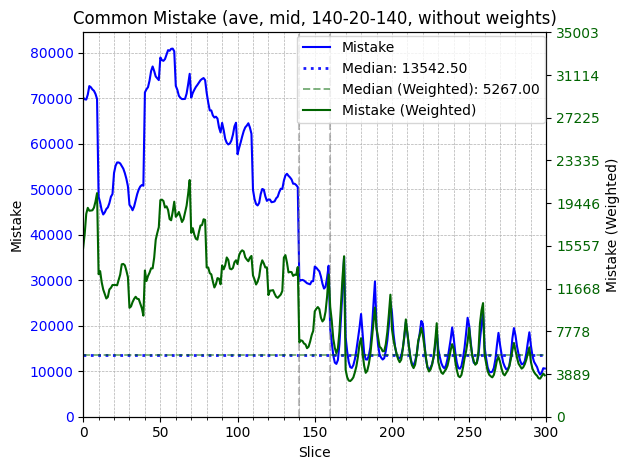

In [3]:
df1 = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140/20250410-1415/metrics/20250410-1415_ratio.csv')
plot(df1, 'Common Mistake (ave, mid, 140-20-140, without weights)')

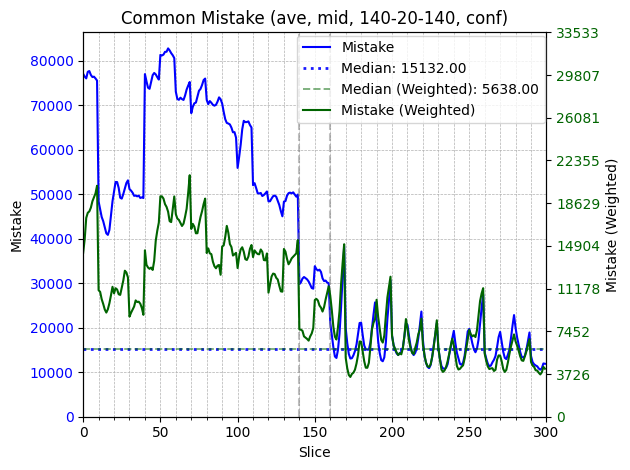

In [4]:
df2 = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140.wan/20250410-1415/metrics/20250410-1415_ratio.csv')
plot(df2, 'Common Mistake (ave, mid, 140-20-140, conf)')

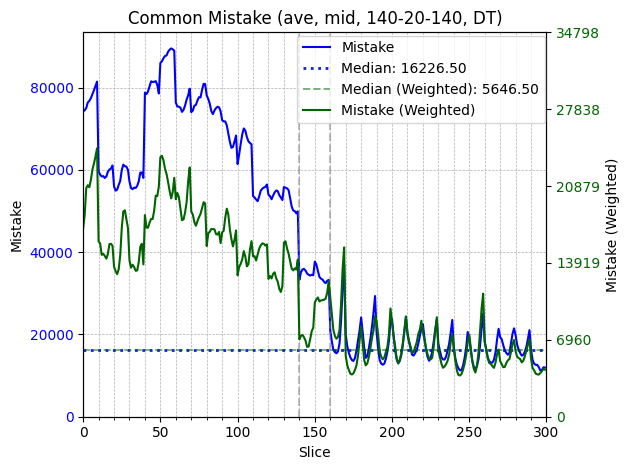

In [5]:
df3 = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140.wdt/20250410-1659/metrics/20250410-1659_ratio.csv')
plot(df3, 'Common Mistake (ave, mid, 140-20-140, DT)')

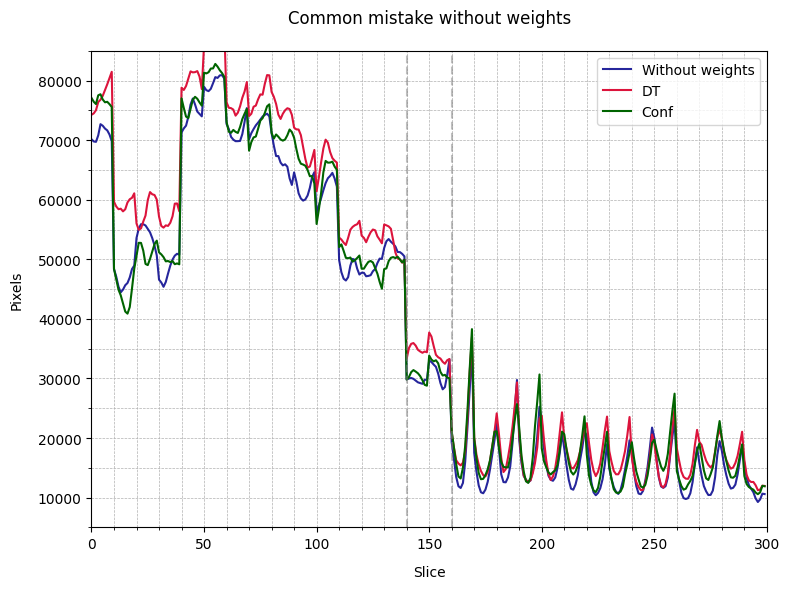

In [6]:
plt.figure(figsize=(8, 6)) 

plt.plot(df1['common mistake'], color='darkblue', label='Without weights', alpha=0.85, linestyle='-') 
plt.plot(df3['common mistake'], color='crimson', label='DT', linestyle='-') 
plt.plot(df2['common mistake'], color='darkgreen', label='Conf', linestyle='-') 

ax = plt.gca()  
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))

ax.yaxis.set_major_locator(plt.MultipleLocator(10000))
ax.yaxis.set_minor_locator(plt.MultipleLocator(5000))

ax.axvline(140, color='gray', alpha=0.5, linestyle='--')
ax.axvline(160, color='gray', alpha=0.5, linestyle='--')

# ax.grid(which='major', linestyle='-', linewidth=0.7, alpha=0.7)
# ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

plt.title("Common mistake without weights", pad=20)
plt.xlabel("Slice", labelpad=10)
plt.ylabel("Pixels", labelpad=10)
plt.xlim(0, 300)
plt.ylim(5000, 85000) 

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

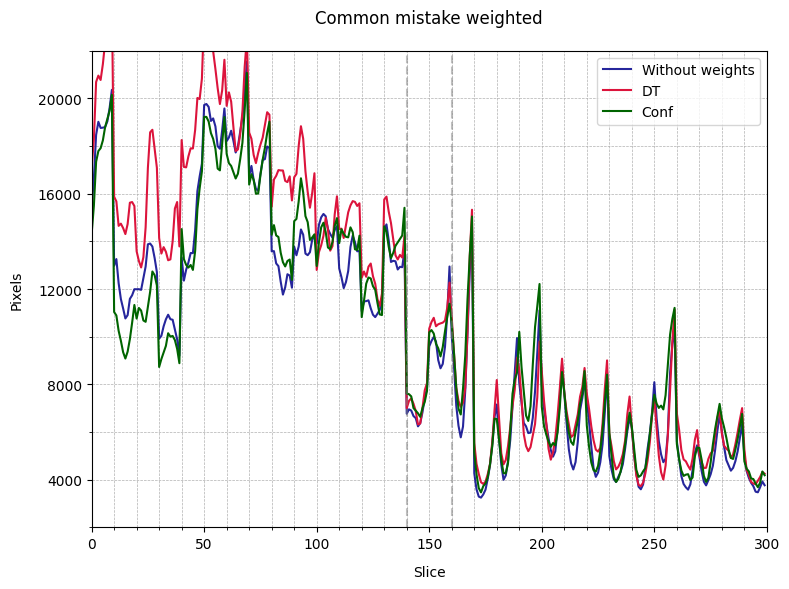

In [7]:
plt.figure(figsize=(8, 6)) 

plt.plot(df1['common mistake weighted'], color='darkblue', label='Without weights', alpha=0.85, linestyle='-') 
plt.plot(df3['common mistake weighted'], color='crimson', label='DT', linestyle='-') 
plt.plot(df2['common mistake weighted'], color='darkgreen', label='Conf', linestyle='-') 

ax = plt.gca()  
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))

ax.yaxis.set_major_locator(plt.MultipleLocator(4000))
ax.yaxis.set_minor_locator(plt.MultipleLocator(2000))

ax.axvline(140, color='gray', alpha=0.5, linestyle='--')
ax.axvline(160, color='gray', alpha=0.5, linestyle='--')

# ax.grid(which='major', linestyle='-', linewidth=0.7, alpha=0.7)
# ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

plt.title("Common mistake weighted", pad=20)
plt.xlabel("Slice", labelpad=10)
plt.ylabel("Pixels", labelpad=10)
plt.xlim(0, 300)
plt.ylim(2000, 22000) 

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_202321/2129724403.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


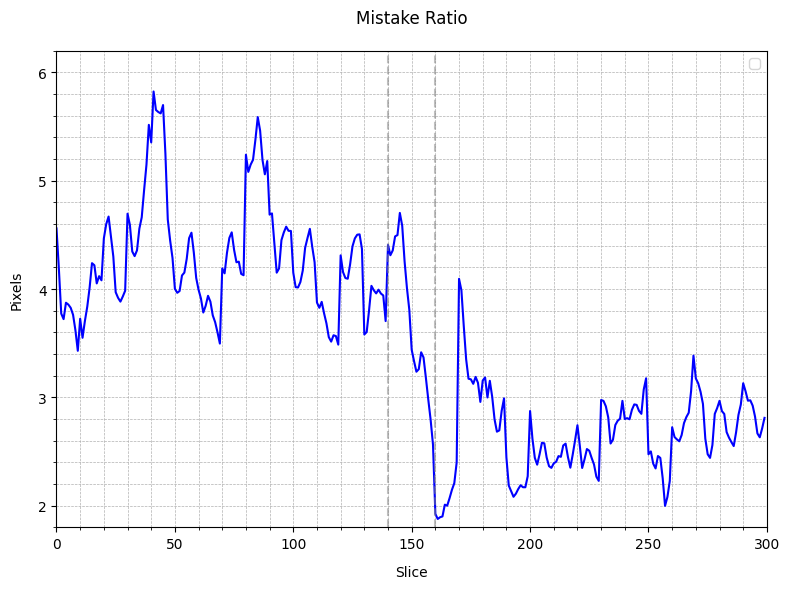

In [8]:
df_ratio = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140/20250410-1415/metrics/20250410-1415_ratio.csv')

plt.figure(figsize=(8, 6)) 

plt.plot(df_ratio['mistake ratio'], color='blue') 

ax = plt.gca()  
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(50))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))

ax.yaxis.set_major_locator(plt.MultipleLocator(1.0))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.2))

ax.axvline(140, color='gray', alpha=0.5, linestyle='--')
ax.axvline(160, color='gray', alpha=0.5, linestyle='--')

# ax.grid(which='major', linestyle='-', linewidth=0.7, alpha=0.7)
# ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

plt.title("Mistake Ratio", pad=20)
plt.xlabel("Slice", labelpad=10)
plt.ylabel("Pixels", labelpad=10)
plt.xlim(0, 300)
plt.ylim(1.8,6.2) 

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [9]:
df_ratio.sort_values(by='mistake ratio', ascending=False).head(20)

,Image,common mistake,common mistake weighted,mistake ratio
41,reco_0042.png,71964,12356,5.824215
45,reco_0046.png,76986,13509,5.698867
42,reco_0043.png,72433,12812,5.653528
43,reco_0044.png,73888,13113,5.634714
44,reco_0045.png,75968,13513,5.621846
85,reco_0086.png,65763,11769,5.587815
39,reco_0040.png,50776,9205,5.516133
86,reco_0087.png,65947,12074,5.461902
84,reco_0085.png,66229,12315,5.377913
40,reco_0041.png,71295,13316,5.354085


In [10]:
df_sm1 = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140/20250410-1415/metrics/20250410-1415_smoothness.csv')
df_sm2 = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140.wdt/20250410-1659/metrics/20250410-1659_smoothness.csv')
df_sm3 = pd.read_csv('/home/vkaryakina/OB/unet-olfactory-bulb-segmentation/experiments.ave_4n7_140_20_140.wan/20250410-1415/metrics/20250410-1415_smoothness.csv')

In [11]:
def plot_smooth(data, epochs_range, smooth_factor, color, label, ls='-'):
    if data is not None:
        data = data.set_index('Epoch')  
        data.index = pd.to_numeric(data.index, errors='coerce')  
        data = data.reindex(epochs_range).interpolate(method='linear').ewm(alpha=smooth_factor).mean()
        plt.plot(epochs_range, data['Mean Unstable Pixels'], label=label, color=color, linewidth=1, ls=ls)

[  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100
 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800
 2850 2900 2950 3000]


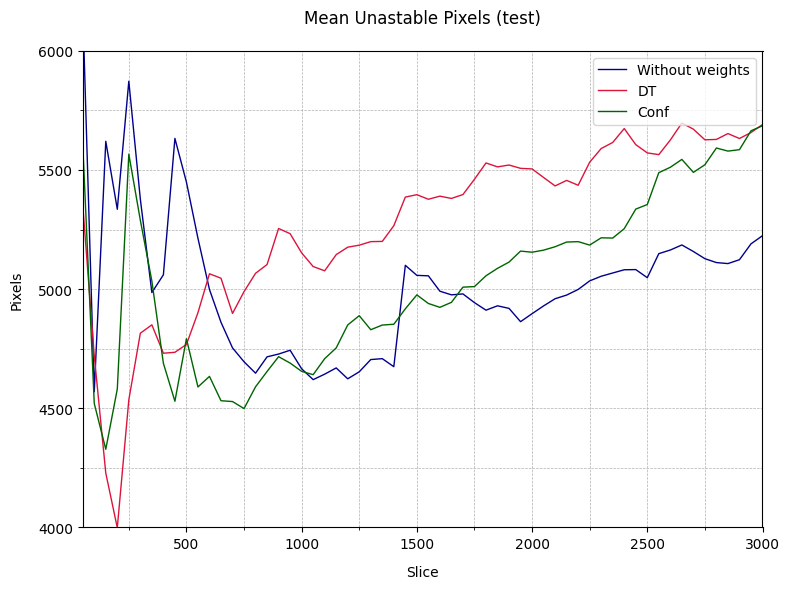

In [12]:
plt.figure(figsize=(8, 6)) 

epochs_range = df_sm1['Epoch'].unique()  
print(epochs_range)

plot_smooth(df_sm1[['Epoch', 'Mean Unstable Pixels']], epochs_range, smooth_factor=0.2, color='darkblue', label='Without weights', ls='-')
plot_smooth(df_sm2[['Epoch', 'Mean Unstable Pixels']], epochs_range, smooth_factor=0.2, color='crimson', label='DT', ls='-') 
plot_smooth(df_sm3[['Epoch', 'Mean Unstable Pixels']], epochs_range, smooth_factor=0.2, color='darkgreen', label='Conf', ls='-') 
# plt.plot(df_sm1['Mean Unstable Pixels'], color='darkblue', label='Without weights',  ls='-') 
# plt.plot(df_sm2['Mean Unstable Pixels'], color='crimson', label='DT', linestyle='-') 
# plt.plot(df_sm3['Mean Unstable Pixels'], color='darkgreen', label='Conf', linestyle='-') 

ax = plt.gca()  
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

# plt.xticks(np.arange(0, 3000, 500))



ax.xaxis.set_major_locator(plt.MultipleLocator(500))
ax.xaxis.set_minor_locator(plt.MultipleLocator(250))

ax.yaxis.set_major_locator(plt.MultipleLocator(500))
ax.yaxis.set_minor_locator(plt.MultipleLocator(250))

# ax.axvline(140, color='gray', alpha=0.5, linestyle='--')
# ax.axvline(160, color='gray', alpha=0.5, linestyle='--')

# ax.grid(which='major', linestyle='-', linewidth=0.7, alpha=0.7)
# ax.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# plt.xticks(np.arange(0, 3000, 500), rotation=0, fontsize=24)  

plt.title("Mean Unastable Pixels (test)", pad=20)
plt.xlabel("Slice", labelpad=10)
plt.ylabel("Pixels", labelpad=10)
# plt.xlim(0, 3000)
plt.ylim(4000, 6000) 

plt.legend(loc='upper right')
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()
plt.show()

[  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400
 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100
 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800
 2850 2900 2950 3000]


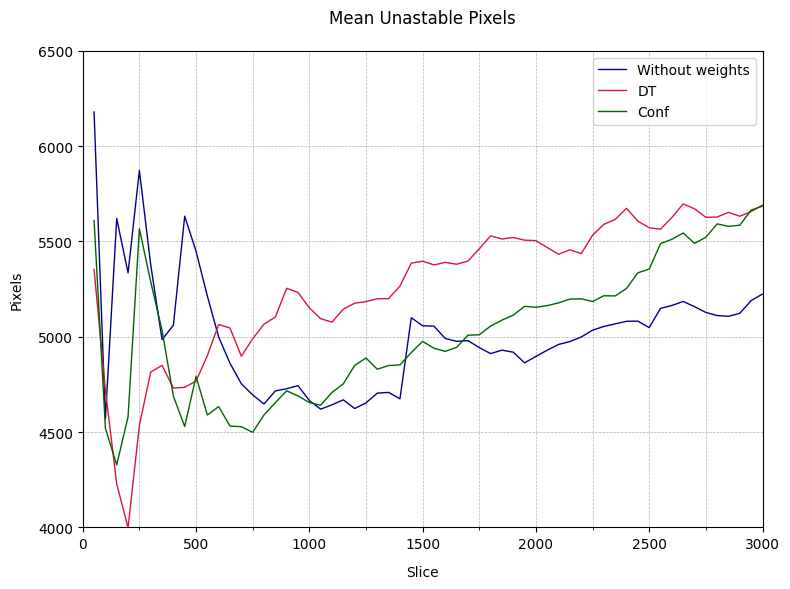

In [13]:
plt.figure(figsize=(8, 6)) 

# Получаем уникальные эпохи и убедимся, что они отсортированы
epochs_range = np.sort(df_sm1['Epoch'].unique())  
print(epochs_range)

plot_smooth(df_sm1[['Epoch', 'Mean Unstable Pixels']], epochs_range, smooth_factor=0.2, color='darkblue', label='Without weights', ls='-')
plot_smooth(df_sm2[['Epoch', 'Mean Unstable Pixels']], epochs_range, smooth_factor=0.2, color='crimson', label='DT', ls='-') 
plot_smooth(df_sm3[['Epoch', 'Mean Unstable Pixels']], epochs_range, smooth_factor=0.2, color='darkgreen', label='Conf', ls='-') 

ax = plt.gca()  
ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)

ax.xaxis.set_major_locator(plt.MultipleLocator(500))
ax.xaxis.set_minor_locator(plt.MultipleLocator(250))

plt.title("Mean Unastable Pixels", pad=20)
plt.xlabel("Slice", labelpad=10)
plt.ylabel("Pixels", labelpad=10)
plt.xlim(0, 3000)
plt.ylim(4000, 6500) 

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

def plot_smooth(data, epochs_range, smooth_factor, color, label, ls='-'):
    if data is not None:
        data = data.set_index('Epoch')  
        data.index = pd.to_numeric(data.index, errors='coerce')  
        # Убедимся, что данные включают начальную точку
        if 0 not in data.index:
            # Добавим начальную точку с первым значением (или другим подходящим)
            data.loc[0] = data.iloc[0]
        data = data.sort_index().reindex(epochs_range).interpolate(method='linear').ewm(alpha=smooth_factor).mean()
        plt.plot(data.index, data['Mean Unstable Pixels'], label=label, color=color, linewidth=2, ls=ls)